In [ ]:
library(dplyr)
library(lsmeans)

In [2]:
cancer=read.table("CancerSurvival.txt",header=TRUE)
head(cancer)
cancer$Organ=factor(cancer$Organ)

Survival,Organ
124,Stomach
42,Stomach
25,Stomach
45,Stomach
412,Stomach
51,Stomach


In [38]:
levels(cancer$Organ)

[1] "Breast"   "Bronchus" "Colon"    "Ovary"    "Stomach"

The anova model is Y_i = miu + a_i + e_i

In [39]:
cancer.mod = lm(Survival ~ Organ, data=cancer)

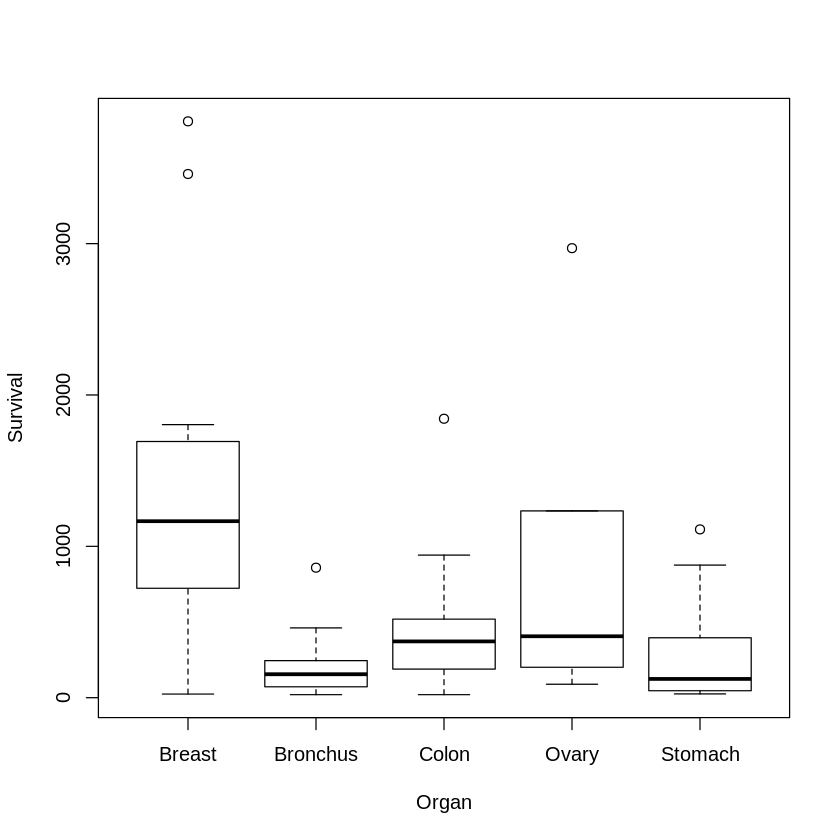

In [40]:
boxplot(split(cancer$Survival,cancer$Organ),ylab="Survival",xlab="Organ")

In [41]:
by(cancer$Survival,cancer$Organ,sd)

cancer$Organ: Breast
[1] 1238.967
------------------------------------------------------------ 
cancer$Organ: Bronchus
[1] 209.8586
------------------------------------------------------------ 
cancer$Organ: Colon
[1] 427.1686
------------------------------------------------------------ 
cancer$Organ: Ovary
[1] 1098.579
------------------------------------------------------------ 
cancer$Organ: Stomach
[1] 346.3096

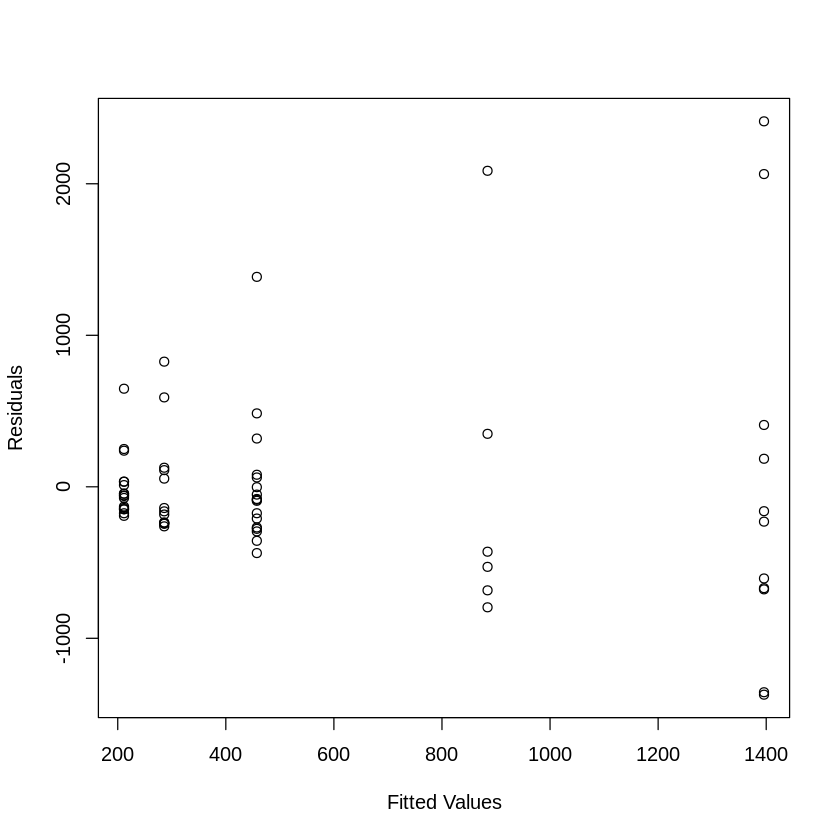

In [42]:
plot(fitted(cancer.mod),resid(cancer.mod),xlab="Fitted Values",ylab="Residuals")

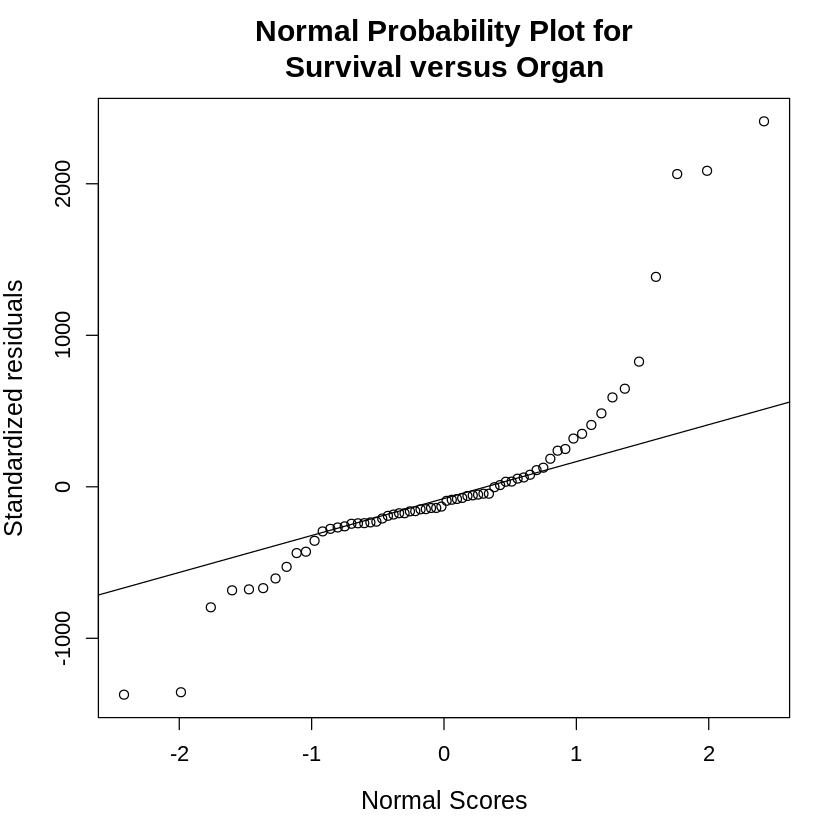

In [43]:
qqnorm(resid(cancer.mod), ylab="Standardized residuals", xlab="Normal Scores",
main="Normal Probability Plot for
Survival versus Organ",
cex.main = 1.5,
cex.axis = 1.1, cex.lab = 1.25)
qqline(resid(cancer.mod))

In [44]:
1238.967/209.8586

[1] 5.903818

Assess assumptions of model: No need to check zero mean assumption because model guarantees this assumption and independece assumption due to nature of dataset. We can see from both the box plots and the residuls vs. fitted values plot that there is no constant variance. We can see that the variance is different from each group. Further we can calculate s_max / s_min which is 1238.967/209.8586 = 5.9 which is greater than or equal to 2 so there is evidence against the constant variance assumption. Based on the QQ plot, the normality assumption is violated. There is some significant departure from the straight line in the normal probability plot at both ends.

Transformation:

In [45]:
cancer.mod2 = lm(log(Survival) ~ Organ, data=cancer)

In [46]:
summary(cancer.mod2)


Call:
lm(formula = log(Survival) ~ Organ, data = cancer)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3805 -0.6607  0.1025  0.8207  2.0460 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.5586     0.3603  18.201  < 2e-16 ***
OrganBronchus  -1.6054     0.4625  -3.472 0.000975 ***
OrganColon     -0.8095     0.4625  -1.750 0.085247 .  
OrganOvary     -0.4080     0.6065  -0.673 0.503801    
OrganStomach   -1.5907     0.4896  -3.249 0.001915 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.195 on 59 degrees of freedom
Multiple R-squared:  0.2252,	Adjusted R-squared:  0.1726 
F-statistic: 4.286 on 4 and 59 DF,  p-value: 0.004122


The percentage of the variability in Survival explained by the 1-way anova model (different organ groups) is 17.3% (R^2 = 0.1726).

Hypotheses:

H_null:a_i=0 for all i

H_alternative: at least one a_i =/= 0 

where i is the organ group (1='Breast', 2='Bronchus', 3= 'Colon', 4='Ovary', 5='Stomach')

In [47]:
anova(cancer.mod2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Organ,4,24.48656,6.121639,4.285967,0.004122
Residuals,59,84.26959,1.428298,NA,NA


Given an F-statistic of 4.29, the p-value from F(4, 59) is 0.004. For an alpha-level of 0.05, this gives strong evidence for rejecting the null hypothesis. Therefore, we conclude that not all types of cancer have the same effect on the mean log survival of patients.

contrast,estimate,SE,df,lower.CL,upper.CL,t.ratio,p.value
Breast - Bronchus,1.60543320,0.4624530,59,0.3041254,2.906741,3.47155935,0.008335192
Breast - Colon,0.80948110,0.4624530,59,-0.4918267,2.110789,1.75040711,0.411915604
Breast - Ovary,0.40798703,0.6065435,59,-1.2987803,2.114754,0.67264270,0.961540851
Breast - Stomach,1.59068365,0.4896063,59,0.2129685,2.968399,3.24890327,0.015813189
Bronchus - Colon,-0.79595210,0.4099208,59,-1.9494382,0.357534,-1.94172160,0.307293818
Bronchus - Ovary,-1.19744617,0.5675097,59,-2.7943753,0.399483,-2.11000135,0.229607890
Bronchus - Stomach,-0.01474955,0.4403256,59,-1.2537924,1.224293,-0.03349692,0.999999705
Colon - Ovary,-0.40149407,0.5675097,59,-1.9984232,1.195435,-0.70746648,0.954000398
Colon - Stomach,0.78120255,0.4403256,59,-0.4578403,2.020245,1.77414751,0.398114645
Ovary - Stomach,1.18269662,0.5898464,59,-0.4770864,2.842480,2.00509254,0.276350639


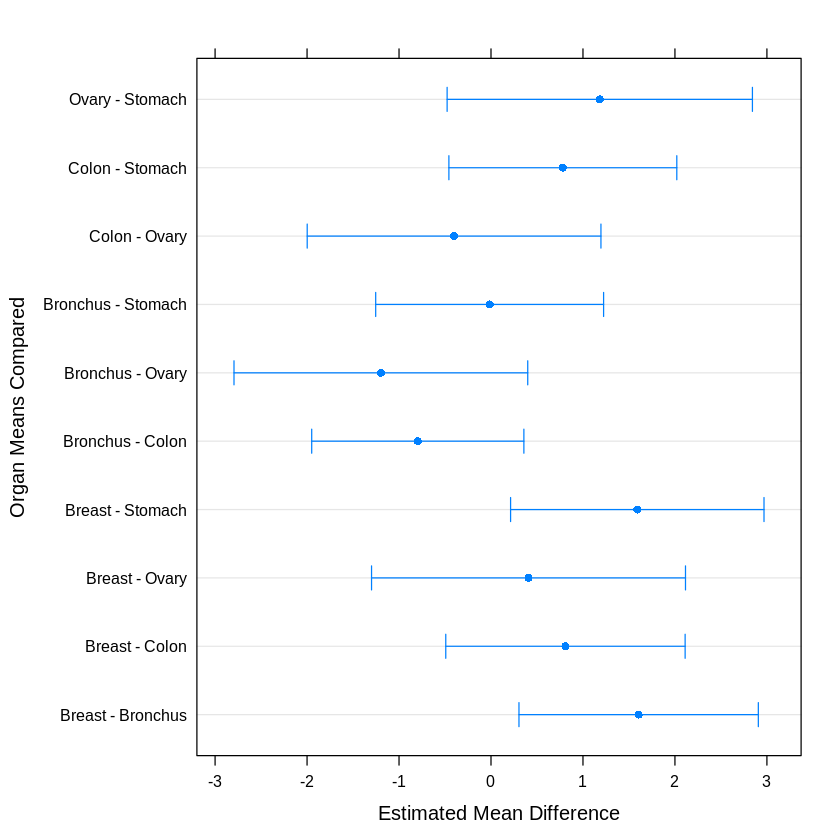

In [48]:
cancer.lsm = lsmeans(cancer.mod2, specs="Organ")
cancer.diffs <- contrast(cancer.lsm,method="pairwise",adjust="tukey")
summary(cancer.diffs, infer=TRUE, level=0.95)
plot(cancer.diffs,xlab="Estimated Mean Difference",ylab="Organ Means Compared")

There are two pairs of means that are significantly different using a p-value level of <0.05 as the significant threshold. They are Breast - Bronchus and Breast - Stomach.